## Final Project Submission

Please fill out: 
* Student name: Gerald Mwangi
* Student pace:  full time
* Scheduled project review date/time: 
* Instructor name: Asha Deen
* Blog post URL: N/A


             MICROSOFT MOVIE STUDIO EXPLORATORY DATA ANALYSIS

    INRODUCTION

    As Microsoft ventures into the realm of movie production, understanding the dynamics of the film industry is crucial for making informed decisions. Through t exploratory data analysis (EDA) of various movie datasets, we aim to provide actionable insights to guide Microsoft's new movie studio in selecting the most promising film genres and strategies for success

    BUSINESS PROBLEM

    Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

    BUSINESS UNDERSTANDING

    Analysing several movie datasets from sources like Box Office Mojo, IMDB, Rotten Tomatoes, TheMovieDB, and The Numbers and analysing this data to find trends and patterns that will help Microsoft make wise choices about the kinds of films it should make.

    INSIGHTS TO BE GENERATED
    1. GENRE ANALYSIS
    2. DIRECTOR ANALYSIS
    3. RELEASE SEASON ANALYSIS



1. DATA UNDERSTANDING

1.1 IMPORTING LIBRARIES

In [112]:
# importing libraries
import pandas as pd 
import numpy as np 
import sqlite3 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

1.2 LOADING DATA SETS

In [113]:
#importing zipfile and extracting data from the zipped data
import zipfile
with zipfile.ZipFile(r"C:\Users\user\Downloads\dsc-phase-1-project-v2-4-master\dsc-phase-1-project-v2-4-master\zippedData\im.db.zip", 'r') as zObject:
    zObject.extractall(path=r"C:\Users\user\Downloads\dsc-phase-1-project-v2-4-master\dsc-phase-1-project-v2-4-master\zippedData")


In [114]:
# Function is created to load the data
def load_data(path, data_format):
    if data_format.lower() == 'csv':
        data = pd.read_csv(path, compression='gzip') 
    elif data_format.lower() == 'db':
        conn = sqlite3.connect(path) 
        return conn
    else:
        raise ValueError('Data format not recognized')
    
    return data

In [115]:
# loading of the number dataset as num_budgets_df
num_budget_df = load_data(r"C:\Users\user\Downloads\dsc-phase-1-project-v2-4-master\dsc-phase-1-project-v2-4-master\zippedData\tn.movie_budgets.csv.gz", "csv")
num_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [116]:
num_budget_df.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [117]:
num_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [118]:
#connect to the imbd dataset

conn = load_data(r"C:\Users\user\Documents\project\dsc-phase-1-project-v2-4\zippedData\im.db\im.db" , "db")
imdb_db = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
imdb_db

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


1.3 EXPLORING THE DIFFERENT TABLES IN THE DATABASE

In [119]:
#exploring the movie basics
movie_basics_df = pd.read_sql("""
                      SELECT * 
                        FROM  movie_basics AS mb """, conn)

movie_basics_df.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [120]:
movie_basics_df.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [121]:
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [122]:
#exploring the movie_akas table
movie_akas_df = pd.read_sql("""
                      SELECT * 
                        FROM  movie_akas
                      ;
                      """, conn)

movie_akas_df.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [123]:
movie_akas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [124]:
#exploring the movie_rating table
movie_ratings_df = pd.read_sql("""
                      SELECT * 
                        FROM  movie_ratings
                      ;
                      """, conn)

movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [125]:
#exploring the directors table
directors_df = pd.read_sql("""
                      SELECT  * 
                        FROM  directors
                      ;
                      """, conn)
directors_df.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [126]:
directors_df.info

<bound method DataFrame.info of          movie_id   person_id
0       tt0285252   nm0899854
1       tt0462036   nm1940585
2       tt0835418   nm0151540
3       tt0835418   nm0151540
4       tt0878654   nm0089502
...           ...         ...
291169  tt8999974  nm10122357
291170  tt9001390   nm6711477
291171  tt9001494  nm10123242
291172  tt9001494  nm10123248
291173  tt9004986   nm4993825

[291174 rows x 2 columns]>

In [127]:
#exploring the writers table
writers_df = pd.read_sql("""
                      SELECT * 
                        FROM  writers
                      ;
                      """, conn)
writers_df.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In [128]:
writers_df.info

<bound method DataFrame.info of          movie_id   person_id
0       tt0285252   nm0899854
1       tt0438973   nm0175726
2       tt0438973   nm1802864
3       tt0462036   nm1940585
4       tt0835418   nm0310087
...           ...         ...
255868  tt8999892  nm10122246
255869  tt8999974  nm10122357
255870  tt9001390   nm6711477
255871  tt9004986   nm4993825
255872  tt9010172   nm8352242

[255873 rows x 2 columns]>

In [129]:
#exploring persons table
persons_df = pd.read_sql("""
                      SELECT * 
                        FROM  persons
                      ;
                      """, conn)

persons_df.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [130]:
persons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB


In [131]:
#SQL QUERY for joining genres,total votes and average  rating from movie rating using the movie id from movie basics
q1 = pd.read_sql(
    """
SELECT b.genres, SUM(numvotes) AS total_votes, AVG(r.averagerating) AS avg_rating
FROM movie_ratings as r
LEFT JOIN movie_basics as b
USING (movie_id)
WHERE start_year BETWEEN 2012 AND 2023
GROUP BY b.genres
ORDER BY total_votes DESC, avg_rating DESC;
""",
    conn)
q1

,genres,total_votes,avg_rating
0,"Action,Adventure,Sci-Fi",18172706,5.628037
1,"Action,Adventure,Fantasy",7179184,5.418293
2,"Action,Adventure,Comedy",6931171,5.514019
3,"Adventure,Animation,Comedy",6539296,5.923762
4,Drama,6523547,6.534099
...,...,...,...
883,"Action,Documentary,Horror",5,6.400000
884,"Comedy,History,War",5,6.200000
885,"Family,War",5,5.800000
886,"Horror,Musical,Romance",5,5.200000


In [132]:
#joining  movie basics,movie akas,persons and director info from imdb database
q2 = pd.read_sql(
    """
SELECT r.movie_id, a.title, r.averagerating AS rating, r.numvotes, b.genres, p.primary_name AS director, b.runtime_minutes
FROM movie_ratings as r
LEFT JOIN movie_basics as b
USING (movie_id)
LEFT JOIN movie_akas as a
USING (movie_id)
LEFT JOIN directors as d
USING (movie_id)
LEFT JOIN persons as p
USING(person_id)
WHERE is_original_title = 1.0
ORDER BY r.averagerating DESC;
""",
    conn
)
q2 = q2.drop_duplicates(subset=["movie_id"])# dropping duplicates
q2.dropna() #dropping null values

,movie_id,title,rating,numvotes,genres,director,runtime_minutes
0,tt10176328,Exteriores: Mulheres Brasileiras na Diplomacia,10.0,5,Documentary,Ivana Diniz,52.0
2,tt5390098,Atlas Mountain: Barbary Macaques - Childcaring...,10.0,5,Documentary,Masahiro Hayakawa,59.0
4,tt5012400,"Pieces of Lives, Pieces of Dreams",9.8,6,Documentary,Hamid Benamra,100.0
5,tt8986906,RISE: The Story of Augustines,9.8,45,"Documentary,Music",Todd Howe,80.0
6,tt6271662,Hizam,9.8,6,Documentary,Hamid Benamra,86.0
...,...,...,...,...,...,...,...
93034,tt4937514,A no dentou,1.0,388,Drama,Keiko Tsuruoka,53.0
93035,tt4986830,Pure Hearts: Into Chinese Showbiz,1.0,453,"Comedy,Drama",Zhifei Bi,96.0
93039,tt6017238,Priklyucheniya Volodi Zlogo,1.0,21,"Adventure,Comedy",Maxim Gromov,76.0
93043,tt4932436,Onna no ko yo shitai to odore,1.0,385,Comedy,Kayoko Asakura,70.0


In [133]:
#preparing to merge the num budgets  df with q2 to form movie_df
num_budget_df = num_budget_df.rename(columns={"movie": "title"})
movie_df = q2.merge(num_budget_df, how = "inner", on="title")#merging



In [134]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2084 entries, 0 to 2083
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           2084 non-null   object 
 1   title              2084 non-null   object 
 2   rating             2084 non-null   float64
 3   numvotes           2084 non-null   int64  
 4   genres             2083 non-null   object 
 5   director           2083 non-null   object 
 6   runtime_minutes    2071 non-null   float64
 7   id                 2084 non-null   int64  
 8   release_date       2084 non-null   object 
 9   production_budget  2084 non-null   object 
 10  domestic_gross     2084 non-null   object 
 11  worldwide_gross    2084 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 195.5+ KB


In [135]:
movie_df.dropna()

,movie_id,title,rating,numvotes,genres,director,runtime_minutes,id,release_date,production_budget,domestic_gross,worldwide_gross
0,tt1375666,Inception,8.8,1841066,"Action,Adventure,Sci-Fi",Christopher Nolan,148.0,38,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
1,tt5797286,Yes,8.7,9,"Adventure,Biography,Documentary",Félix Rose,80.0,47,"Jun 24, 2005","$1,700,000","$396,035","$661,221"
2,tt0816692,Interstellar,8.6,1299334,"Adventure,Drama,Sci-Fi",Christopher Nolan,169.0,32,"Nov 5, 2014","$165,000,000","$188,017,894","$666,379,375"
3,tt2421956,Butterfly Girl,8.6,43,Documentary,Cary Bell,78.0,45,"Feb 27, 2015","$180,000","$17,503","$17,503"
4,tt2233624,Kin,8.6,46,"Drama,Music",Rachel Lambert,45.0,88,"Aug 31, 2018","$30,000,000","$5,718,096","$10,096,821"
...,...,...,...,...,...,...,...,...,...,...,...,...
2079,tt2149137,Snow White: A Deadly Summer,2.2,679,Horror,David DeCoteau,83.0,11,"Mar 20, 2012","$1,000,000",$0,$0
2080,tt2909932,Subconscious,2.2,323,"Action,Mystery,Thriller",Georgia Hilton,122.0,78,"Mar 10, 2015","$500,000",$0,$0
2081,tt2814362,United Passions,2.1,3878,"Drama,History,Sport",Frédéric Auburtin,110.0,6,"Jun 5, 2015","$30,000,000",$918,"$168,832"
2082,tt0249516,Foodfight!,1.9,8248,"Action,Animation,Comedy",Lawrence Kasanoff,91.0,26,"Dec 31, 2012","$45,000,000",$0,"$73,706"


At these stage i was exploring my data trying to make sense of  my data to seeing how i will prepare it,manupulate it and analysis it

2.  DATA CLEANING AND PREPERATION

First we will get the return in investment (ROI) using the numbers dataset

In [136]:
#LIMIT  the analysis to the last ten years
num_budget_df = num_budget_df[num_budget_df['release_date'].apply(lambda x: int(x.split(" ")[-1]) >= 2014)]

num_budget_df

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
...,...,...,...,...,...,...
5756,57,"Apr 21, 2015",The Front Man,"$20,000",$0,$0
5761,62,"Dec 31, 2014",Stories of Our Lives,"$15,000",$0,$0
5771,72,"May 19, 2015",Family Motocross,"$10,000",$0,$0
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0


 we need to see the top 200 best grossing films

In [137]:
# creating a function to convert the production_budget, domestic_gross, and worldwide_gross columns to numeric values
def numeric(df, column):
    df[column] = pd.to_numeric(df[column].str.replace(",", "").str.replace("$", ""))
    
    return df

numeric(num_budget_df, 'production_budget') 
numeric(num_budget_df, 'domestic_gross') 
numeric(num_budget_df, 'worldwide_gross') 

num_budget_df 

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
...,...,...,...,...,...,...
5756,57,"Apr 21, 2015",The Front Man,20000,0,0
5761,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0
5771,72,"May 19, 2015",Family Motocross,10000,0,0
5777,78,"Dec 31, 2018",Red 11,7000,0,0


In [138]:
# Finding the Top 200 films with the highest worldwide gross
num_budget_df = num_budget_df.sort_values(by='worldwide_gross', ascending=False)[:200]
num_budget_df

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864
66,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
...,...,...,...,...,...,...
568,69,"Sep 28, 2018",Smallfoot,80000000,83240103,213691277
1095,96,"Nov 21, 2018",Creed II,50000000,115715889,213591522
976,77,"Dec 25, 2014",Into the Woods,56200000,128002372,213116401
567,68,"Oct 17, 2014",Fury,80000000,85817906,210315681


In [139]:
# Creating a new column called 'RoI' that calculates the return on investment (RoI) for each film
#  formula for calculating RoI is to divide the film’s box office earnings by the production budget and multiplying the result by 100
num_budget_df['RoI'] = num_budget_df['worldwide_gross'] / num_budget_df['production_budget'] * 100

num_budget_df

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,RoI
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,671.016739
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,682.711400
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,766.909239
66,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,799.327786
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,424.384139
...,...,...,...,...,...,...,...
568,69,"Sep 28, 2018",Smallfoot,80000000,83240103,213691277,267.114096
1095,96,"Nov 21, 2018",Creed II,50000000,115715889,213591522,427.183044
976,77,"Dec 25, 2014",Into the Woods,56200000,128002372,213116401,379.210678
567,68,"Oct 17, 2014",Fury,80000000,85817906,210315681,262.894601


In [140]:
# arranging the DataFrame according to the 'RoI' column
num_budget_df = num_budget_df.sort_values(by='RoI', ascending=False)

num_budget_df

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,RoI
4249,50,"Jan 20, 2017",Split,5000000,138141585,278964806,5579.296120
4248,49,"Feb 24, 2017",Get Out,5000000,176040665,255367951,5107.359020
4083,84,"Oct 3, 2014",Annabelle,6500000,84273813,256862920,3951.737231
3755,56,"Dec 21, 2016",Dangal,9500000,12391761,294654618,3101.627558
3342,43,"Jun 6, 2014",The Fault in Our Stars,12000000,124872350,307166834,2559.723617
...,...,...,...,...,...,...,...
125,26,"May 27, 2016",Alice Through the Looking Glass,170000000,77042381,276928112,162.898889
203,4,"Jul 15, 2016",Ghostbusters,144000000,128350574,229008658,159.033790
11,12,"May 25, 2018",Solo: A Star Wars Story,275000000,213767512,393151347,142.964126
79,80,"Oct 6, 2017",Blade Runner 2049,185000000,92054159,259357408,140.193194


We need to know what makes the films that are performing the best according to our metric successful now that we have  cleaned the data  being used. At this point in the data preparation process, we want to combine, all features of the best-grossing films into a single dataset. Genre, Runtime (Length), Director(s) & Writer(s), Cast, Gross Revenue, Rating, and Production Budget 

In [141]:
# first we will drop the films in the 'movie_basics_df' that are older than 10 years
movie_basics_df = movie_basics_df[movie_basics_df['start_year'] >= 2014]

movie_basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary


lets look for a unique column to use to oin the dataframes

In [142]:
# lets Identify a unique column within the 'num_budget_df' DataFrame that can be used to join data from other sources.
print(f"The release_date column has {len(num_budget_df.release_date.unique())} unique values") 
print(f"The movie column has {len(num_budget_df.title.unique())} unique values")

The release_date column has 167 unique values
The movie column has 200 unique values


In [143]:
# Joining the 'num_budget_df' and 'movie_basics_df' DataFrames on the 'original_title' column and assign the resulting DataFrame to 'movie_data_df'
movie_data_df = num_budget_df.join(movie_basics_df.set_index('original_title'), on='title', how='inner')

movie_data_df

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,RoI,movie_id,primary_title,start_year,runtime_minutes,genres
4249,50,"Jan 20, 2017",Split,5000000,138141585,278964806,5579.296120,tt2660118,Split,2016,90.0,"Comedy,Romance,Sport"
4249,50,"Jan 20, 2017",Split,5000000,138141585,278964806,5579.296120,tt3315656,Split,2016,127.0,"Drama,Fantasy"
4249,50,"Jan 20, 2017",Split,5000000,138141585,278964806,5579.296120,tt3604256,Split,2016,NaN,Crime
4249,50,"Jan 20, 2017",Split,5000000,138141585,278964806,5579.296120,tt4972582,Split,2016,117.0,"Horror,Thriller"
4249,50,"Jan 20, 2017",Split,5000000,138141585,278964806,5579.296120,tt5495666,Split,2016,80.0,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...
125,26,"May 27, 2016",Alice Through the Looking Glass,170000000,77042381,276928112,162.898889,tt2567026,Alice Through the Looking Glass,2016,113.0,"Adventure,Family,Fantasy"
203,4,"Jul 15, 2016",Ghostbusters,144000000,128350574,229008658,159.033790,tt1289401,Ghostbusters,2016,116.0,"Action,Comedy,Fantasy"
11,12,"May 25, 2018",Solo: A Star Wars Story,275000000,213767512,393151347,142.964126,tt3778644,Solo: A Star Wars Story,2018,135.0,"Action,Adventure,Fantasy"
79,80,"Oct 6, 2017",Blade Runner 2049,185000000,92054159,259357408,140.193194,tt1856101,Blade Runner 2049,2017,164.0,"Drama,Mystery,Sci-Fi"


In [144]:
# Droping  missing values 'runtime_minutes' values
movie_data_df = movie_data_df.dropna(subset=['runtime_minutes'])

movie_data_df

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,RoI,movie_id,primary_title,start_year,runtime_minutes,genres
4249,50,"Jan 20, 2017",Split,5000000,138141585,278964806,5579.296120,tt2660118,Split,2016,90.0,"Comedy,Romance,Sport"
4249,50,"Jan 20, 2017",Split,5000000,138141585,278964806,5579.296120,tt3315656,Split,2016,127.0,"Drama,Fantasy"
4249,50,"Jan 20, 2017",Split,5000000,138141585,278964806,5579.296120,tt4972582,Split,2016,117.0,"Horror,Thriller"
4249,50,"Jan 20, 2017",Split,5000000,138141585,278964806,5579.296120,tt5495666,Split,2016,80.0,Drama
4249,50,"Jan 20, 2017",Split,5000000,138141585,278964806,5579.296120,tt6147768,Split,2016,123.0,"Action,Drama,Sport"
...,...,...,...,...,...,...,...,...,...,...,...,...
125,26,"May 27, 2016",Alice Through the Looking Glass,170000000,77042381,276928112,162.898889,tt2567026,Alice Through the Looking Glass,2016,113.0,"Adventure,Family,Fantasy"
203,4,"Jul 15, 2016",Ghostbusters,144000000,128350574,229008658,159.033790,tt1289401,Ghostbusters,2016,116.0,"Action,Comedy,Fantasy"
11,12,"May 25, 2018",Solo: A Star Wars Story,275000000,213767512,393151347,142.964126,tt3778644,Solo: A Star Wars Story,2018,135.0,"Action,Adventure,Fantasy"
79,80,"Oct 6, 2017",Blade Runner 2049,185000000,92054159,259357408,140.193194,tt1856101,Blade Runner 2049,2017,164.0,"Drama,Mystery,Sci-Fi"


In [145]:
# Creating a new column called 'release_year' that extracts the year from the 'release_date' column
movie_data_df['release_year'] =movie_data_df ['release_date'].apply(lambda x: int(x.split(" ")[-1]))


#Compare the 'release_year' column to the 'start_year' column. Drop the conflicting records
movie_data_df = movie_data_df.loc[movie_data_df['release_year'] == movie_data_df['start_year']]

movie_data_df

C:\Users\user\AppData\Local\Temp\ipykernel_13224\3730622552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data_df['release_year'] =movie_data_df ['release_date'].apply(lambda x: int(x.split(" ")[-1]))


,id,release_date,title,production_budget,domestic_gross,worldwide_gross,RoI,movie_id,primary_title,start_year,runtime_minutes,genres,release_year
4248,49,"Feb 24, 2017",Get Out,5000000,176040665,255367951,5107.359020,tt5052448,Get Out,2017,104.0,"Horror,Mystery,Thriller",2017
4083,84,"Oct 3, 2014",Annabelle,6500000,84273813,256862920,3951.737231,tt3322940,Annabelle,2014,99.0,"Horror,Mystery,Thriller",2014
3755,56,"Dec 21, 2016",Dangal,9500000,12391761,294654618,3101.627558,tt5074352,Dangal,2016,161.0,"Action,Biography,Drama",2016
3342,43,"Jun 6, 2014",The Fault in Our Stars,12000000,124872350,307166834,2559.723617,tt2582846,The Fault in Our Stars,2014,126.0,"Drama,Romance",2014
3535,36,"Oct 19, 2018",Halloween,10000000,159342015,254900667,2549.006670,tt1502407,Halloween,2018,106.0,"Horror,Thriller",2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,26,"May 27, 2016",Alice Through the Looking Glass,170000000,77042381,276928112,162.898889,tt2567026,Alice Through the Looking Glass,2016,113.0,"Adventure,Family,Fantasy",2016
203,4,"Jul 15, 2016",Ghostbusters,144000000,128350574,229008658,159.033790,tt1289401,Ghostbusters,2016,116.0,"Action,Comedy,Fantasy",2016
11,12,"May 25, 2018",Solo: A Star Wars Story,275000000,213767512,393151347,142.964126,tt3778644,Solo: A Star Wars Story,2018,135.0,"Action,Adventure,Fantasy",2018
79,80,"Oct 6, 2017",Blade Runner 2049,185000000,92054159,259357408,140.193194,tt1856101,Blade Runner 2049,2017,164.0,"Drama,Mystery,Sci-Fi",2017


In [146]:
# Joining the 'movie_ratings_df' to the 'movie_data_df' DataFrame on the 'movie_id' column
movie_data_df = movie_data_df.join(movie_ratings_df.set_index('movie_id'), on='movie_id', how='inner')

movie_data_df

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,RoI,movie_id,primary_title,start_year,runtime_minutes,genres,release_year,averagerating,numvotes
4248,49,"Feb 24, 2017",Get Out,5000000,176040665,255367951,5107.359020,tt5052448,Get Out,2017,104.0,"Horror,Mystery,Thriller",2017,7.7,400474
4083,84,"Oct 3, 2014",Annabelle,6500000,84273813,256862920,3951.737231,tt3322940,Annabelle,2014,99.0,"Horror,Mystery,Thriller",2014,5.4,122039
3755,56,"Dec 21, 2016",Dangal,9500000,12391761,294654618,3101.627558,tt5074352,Dangal,2016,161.0,"Action,Biography,Drama",2016,8.5,123638
3342,43,"Jun 6, 2014",The Fault in Our Stars,12000000,124872350,307166834,2559.723617,tt2582846,The Fault in Our Stars,2014,126.0,"Drama,Romance",2014,7.7,315135
3535,36,"Oct 19, 2018",Halloween,10000000,159342015,254900667,2549.006670,tt1502407,Halloween,2018,106.0,"Horror,Thriller",2018,6.6,88395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,26,"May 27, 2016",Alice Through the Looking Glass,170000000,77042381,276928112,162.898889,tt2567026,Alice Through the Looking Glass,2016,113.0,"Adventure,Family,Fantasy",2016,6.2,79951
203,4,"Jul 15, 2016",Ghostbusters,144000000,128350574,229008658,159.033790,tt1289401,Ghostbusters,2016,116.0,"Action,Comedy,Fantasy",2016,5.2,186788
11,12,"May 25, 2018",Solo: A Star Wars Story,275000000,213767512,393151347,142.964126,tt3778644,Solo: A Star Wars Story,2018,135.0,"Action,Adventure,Fantasy",2018,7.0,226243
79,80,"Oct 6, 2017",Blade Runner 2049,185000000,92054159,259357408,140.193194,tt1856101,Blade Runner 2049,2017,164.0,"Drama,Mystery,Sci-Fi",2017,8.0,376241


In [147]:
#lets check for duplicate records
# 
duplicate_records = set(movie_data_df[movie_data_df.duplicated(subset='title')].title)
len(duplicate_records)


2

In [148]:
#lets examine the records that belong to the specified set of movies
movie_data_df[movie_data_df.title.isin(duplicate_records)]

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,RoI,movie_id,primary_title,start_year,runtime_minutes,genres,release_year,averagerating,numvotes
101,2,"Nov 22, 2017",Coco,175000000,209726015,798008101,456.004629,tt2380307,Coco,2017,105.0,"Adventure,Animation,Comedy",2017,8.4,277194
101,2,"Nov 22, 2017",Coco,175000000,209726015,798008101,456.004629,tt7002100,Coco,2017,98.0,Horror,2017,7.4,35
383,84,"Jul 25, 2014",Hercules,100000000,72688614,243388614,243.388614,tt1267297,Hercules,2014,98.0,"Action,Adventure,Fantasy",2014,6.0,137287
383,84,"Jul 25, 2014",Hercules,100000000,72688614,243388614,243.388614,tt3985956,Hercules,2014,112.0,Comedy,2014,6.2,72


In [149]:
# Drop records that have 'Coco'  and 'Hercules'as the movie title
movie_data_df.drop(movie_data_df[movie_data_df['title'] == 'Coco'].index, inplace = True)
movie_data_df.drop(movie_data_df[movie_data_df['title'] == 'Hercules'].index, inplace = True)


movie_data_df

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,RoI,movie_id,primary_title,start_year,runtime_minutes,genres,release_year,averagerating,numvotes
4248,49,"Feb 24, 2017",Get Out,5000000,176040665,255367951,5107.359020,tt5052448,Get Out,2017,104.0,"Horror,Mystery,Thriller",2017,7.7,400474
4083,84,"Oct 3, 2014",Annabelle,6500000,84273813,256862920,3951.737231,tt3322940,Annabelle,2014,99.0,"Horror,Mystery,Thriller",2014,5.4,122039
3755,56,"Dec 21, 2016",Dangal,9500000,12391761,294654618,3101.627558,tt5074352,Dangal,2016,161.0,"Action,Biography,Drama",2016,8.5,123638
3342,43,"Jun 6, 2014",The Fault in Our Stars,12000000,124872350,307166834,2559.723617,tt2582846,The Fault in Our Stars,2014,126.0,"Drama,Romance",2014,7.7,315135
3535,36,"Oct 19, 2018",Halloween,10000000,159342015,254900667,2549.006670,tt1502407,Halloween,2018,106.0,"Horror,Thriller",2018,6.6,88395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,26,"May 27, 2016",Alice Through the Looking Glass,170000000,77042381,276928112,162.898889,tt2567026,Alice Through the Looking Glass,2016,113.0,"Adventure,Family,Fantasy",2016,6.2,79951
203,4,"Jul 15, 2016",Ghostbusters,144000000,128350574,229008658,159.033790,tt1289401,Ghostbusters,2016,116.0,"Action,Comedy,Fantasy",2016,5.2,186788
11,12,"May 25, 2018",Solo: A Star Wars Story,275000000,213767512,393151347,142.964126,tt3778644,Solo: A Star Wars Story,2018,135.0,"Action,Adventure,Fantasy",2018,7.0,226243
79,80,"Oct 6, 2017",Blade Runner 2049,185000000,92054159,259357408,140.193194,tt1856101,Blade Runner 2049,2017,164.0,"Drama,Mystery,Sci-Fi",2017,8.0,376241


Lets start data cleaning by removing irrelevant columns from our data frame. The columns that shall be dropped are: 'id', 'domestic_gross', 'primary_title', 'start_year', 'release_year', and 'numvotes'

In [150]:
 #Dropping columns
movie_data_df.drop(columns=['id', 'domestic_gross', 'primary_title', 'start_year', 'release_year', 'numvotes'], inplace=True)

movie_data_df

,release_date,title,production_budget,worldwide_gross,RoI,movie_id,runtime_minutes,genres,averagerating
4248,"Feb 24, 2017",Get Out,5000000,255367951,5107.359020,tt5052448,104.0,"Horror,Mystery,Thriller",7.7
4083,"Oct 3, 2014",Annabelle,6500000,256862920,3951.737231,tt3322940,99.0,"Horror,Mystery,Thriller",5.4
3755,"Dec 21, 2016",Dangal,9500000,294654618,3101.627558,tt5074352,161.0,"Action,Biography,Drama",8.5
3342,"Jun 6, 2014",The Fault in Our Stars,12000000,307166834,2559.723617,tt2582846,126.0,"Drama,Romance",7.7
3535,"Oct 19, 2018",Halloween,10000000,254900667,2549.006670,tt1502407,106.0,"Horror,Thriller",6.6
...,...,...,...,...,...,...,...,...,...
125,"May 27, 2016",Alice Through the Looking Glass,170000000,276928112,162.898889,tt2567026,113.0,"Adventure,Family,Fantasy",6.2
203,"Jul 15, 2016",Ghostbusters,144000000,229008658,159.033790,tt1289401,116.0,"Action,Comedy,Fantasy",5.2
11,"May 25, 2018",Solo: A Star Wars Story,275000000,393151347,142.964126,tt3778644,135.0,"Action,Adventure,Fantasy",7.0
79,"Oct 6, 2017",Blade Runner 2049,185000000,259357408,140.193194,tt1856101,164.0,"Drama,Mystery,Sci-Fi",8.0


In [151]:
# Reseting the index of the 'movie_data_df' DataFrame
movie_data_df.set_index('movie_id', inplace=True)
movie_data_df.reset_index(inplace=True)
movie_data_df

,movie_id,release_date,title,production_budget,worldwide_gross,RoI,runtime_minutes,genres,averagerating
0,tt5052448,"Feb 24, 2017",Get Out,5000000,255367951,5107.359020,104.0,"Horror,Mystery,Thriller",7.7
1,tt3322940,"Oct 3, 2014",Annabelle,6500000,256862920,3951.737231,99.0,"Horror,Mystery,Thriller",5.4
2,tt5074352,"Dec 21, 2016",Dangal,9500000,294654618,3101.627558,161.0,"Action,Biography,Drama",8.5
3,tt2582846,"Jun 6, 2014",The Fault in Our Stars,12000000,307166834,2559.723617,126.0,"Drama,Romance",7.7
4,tt1502407,"Oct 19, 2018",Halloween,10000000,254900667,2549.006670,106.0,"Horror,Thriller",6.6
...,...,...,...,...,...,...,...,...,...
164,tt2567026,"May 27, 2016",Alice Through the Looking Glass,170000000,276928112,162.898889,113.0,"Adventure,Family,Fantasy",6.2
165,tt1289401,"Jul 15, 2016",Ghostbusters,144000000,229008658,159.033790,116.0,"Action,Comedy,Fantasy",5.2
166,tt3778644,"May 25, 2018",Solo: A Star Wars Story,275000000,393151347,142.964126,135.0,"Action,Adventure,Fantasy",7.0
167,tt1856101,"Oct 6, 2017",Blade Runner 2049,185000000,259357408,140.193194,164.0,"Drama,Mystery,Sci-Fi",8.0


In [152]:
# Converting the 'release_date' column to a datetime object
movie_data_df['release_date'] = pd.to_datetime(movie_data_df['release_date'], format='%b %d, %Y')
movie_data_df

,movie_id,release_date,title,production_budget,worldwide_gross,RoI,runtime_minutes,genres,averagerating
0,tt5052448,2017-02-24,Get Out,5000000,255367951,5107.359020,104.0,"Horror,Mystery,Thriller",7.7
1,tt3322940,2014-10-03,Annabelle,6500000,256862920,3951.737231,99.0,"Horror,Mystery,Thriller",5.4
2,tt5074352,2016-12-21,Dangal,9500000,294654618,3101.627558,161.0,"Action,Biography,Drama",8.5
3,tt2582846,2014-06-06,The Fault in Our Stars,12000000,307166834,2559.723617,126.0,"Drama,Romance",7.7
4,tt1502407,2018-10-19,Halloween,10000000,254900667,2549.006670,106.0,"Horror,Thriller",6.6
...,...,...,...,...,...,...,...,...,...
164,tt2567026,2016-05-27,Alice Through the Looking Glass,170000000,276928112,162.898889,113.0,"Adventure,Family,Fantasy",6.2
165,tt1289401,2016-07-15,Ghostbusters,144000000,229008658,159.033790,116.0,"Action,Comedy,Fantasy",5.2
166,tt3778644,2018-05-25,Solo: A Star Wars Story,275000000,393151347,142.964126,135.0,"Action,Adventure,Fantasy",7.0
167,tt1856101,2017-10-06,Blade Runner 2049,185000000,259357408,140.193194,164.0,"Drama,Mystery,Sci-Fi",8.0


In [153]:
# overview of the numeric data in the  DataFrame
movie_data_df.describe()

,release_date,production_budget,worldwide_gross,RoI,runtime_minutes,averagerating
count,169,1.690000e+02,1.690000e+02,169.000000,169.000000,169.000000
mean,2016-08-21 02:50:24.852070912,1.214633e+08,5.261496e+08,627.330766,118.473373,6.841420
min,2014-02-07 00:00:00,5.000000e+06,2.094614e+08,119.499087,72.000000,3.200000
25%,2015-03-27 00:00:00,6.500000e+07,2.909301e+08,293.206974,105.000000,6.300000
50%,2016-09-09 00:00:00,1.250000e+08,4.029760e+08,414.780490,118.000000,6.800000
75%,2017-11-17 00:00:00,1.700000e+08,6.663794e+08,675.182944,132.000000,7.500000
max,2019-05-31 00:00:00,3.306000e+08,2.048134e+09,5107.359020,169.000000,8.600000
std,NaN,6.785141e+07,3.203445e+08,657.004196,18.861357,0.890927


We are done with data preparation and cleaning and now have relevant data to be able to generte insights

     3.  DATA ANALYSIS

     We will now perform EDA on our data to generate insights, conclusion and recomedations

3.1 Directors analysis
   
   These will compare different directors and ther return on investment

In [154]:
# Creating a copy of the  DataFrame to a new variable called 'director_data_df'
director_data_df = movie_df.copy()

director_data_df["production_budget"] = director_data_df["production_budget"].apply(
    lambda x: 0 if x == 0 else float(x.split()[0].replace(",", "").replace("$", ""))
)  # reformat as float

director_data_df["domestic_gross"] = director_data_df["domestic_gross"].apply(
    lambda x: 0 if x == 0 else float(x.split()[0].replace(",", "").replace("$", ""))
)  # reformat as float

director_data_df["worldwide_gross"] = director_data_df["worldwide_gross"].apply(
    lambda x: 0 if x == 0 else float(x.split()[0].replace(",", "").replace("$", ""))
)  # reformat as float




In [155]:
# creatIing earnings, gross and production budget column in Millions
director_data_df["gross-budget"] = director_data_df["worldwide_gross"] - director_data_df["production_budget"]
director_data_df["earning(mio)"] = round(director_data_df["gross-budget"] / 1000000)
director_data_df["budget(mio)"] = round(director_data_df["production_budget"] / 1000000)
director_data_df["world_gross(mio)"] = round(director_data_df["worldwide_gross"] / 1000000)
director_data_df["ROI"] = round(director_data_df["budget(mio)"] / director_data_df["earning(mio)"] * 100)

In [156]:
# Creating a new table that groups the data for each director.
directors = director_data_df.groupby(["director"]).agg(
    {
        "world_gross(mio)": ["mean", "count", "sum"],
        "budget(mio)": ["mean"],
        "rating": ["mean"],
        "earning(mio)": ["mean"],
    }
)
directors.columns = [
    "world_gross_avg",
    "movie_count",
    "gross_sum",
    "production_budget_avg",
    "rating_avg",
    "earning_avg",
]  # rename columns
directors = directors.reset_index()  # remove index
directors10 = directors.sort_values(by=["world_gross_avg"], ascending=False).head(
    10
)  

3.2 Genre Analysis 

We will now analysis the genre comparing it  with return in investment

In [157]:
# Assigning the top_movies_df DataFrame to a new variable called 'genre_data_df'. It shall be used for genre analysis
genre_data_df = movie_data_df.copy()
genre_data_df['genres'] = genre_data_df.genres.apply(lambda x: x.split(','))

genre_data_df = genre_data_df.explode('genres') # Normalize the 'genres' column by exploding the list of genres

genre_data_df.head()

,movie_id,release_date,title,production_budget,worldwide_gross,RoI,runtime_minutes,genres,averagerating
0,tt5052448,2017-02-24,Get Out,5000000,255367951,5107.359020,104.0,Horror,7.7
0,tt5052448,2017-02-24,Get Out,5000000,255367951,5107.359020,104.0,Mystery,7.7
0,tt5052448,2017-02-24,Get Out,5000000,255367951,5107.359020,104.0,Thriller,7.7
1,tt3322940,2014-10-03,Annabelle,6500000,256862920,3951.737231,99.0,Horror,5.4
1,tt3322940,2014-10-03,Annabelle,6500000,256862920,3951.737231,99.0,Mystery,5.4


 3.3 Seasons when Movies were released analysis

In [158]:
# creating a variable release df  for the release date which makes a copy fron the monie data df
release_df = movie_data_df.copy()
release_df['release_month'] = release_df["release_date"].dt.strftime('%B').astype(str)#Creating a new column that contains the month that the movies were released
# Creating a dictionary that maps months to their season
season_dict = {'January':'Winter',
           'February':'Winter',
           'March':'Spring',
           'April':'Spring',
           'May':'Spring',
           'June':'Summer',
           'July':'Summer',
           'August':'Summer',
           'September':'Fall',
           'October':'Fall',
           'November':'Fall',
           'December':'Winter'}

# Create a new column that contains the season that the movie was released in
release_df['release_season'] = release_df['release_month'].map(season_dict)

release_df.head()

,movie_id,release_date,title,production_budget,worldwide_gross,RoI,runtime_minutes,genres,averagerating,release_month,release_season
0,tt5052448,2017-02-24,Get Out,5000000,255367951,5107.359020,104.0,"Horror,Mystery,Thriller",7.7,February,Winter
1,tt3322940,2014-10-03,Annabelle,6500000,256862920,3951.737231,99.0,"Horror,Mystery,Thriller",5.4,October,Fall
2,tt5074352,2016-12-21,Dangal,9500000,294654618,3101.627558,161.0,"Action,Biography,Drama",8.5,December,Winter
3,tt2582846,2014-06-06,The Fault in Our Stars,12000000,307166834,2559.723617,126.0,"Drama,Romance",7.7,June,Summer
4,tt1502407,2018-10-19,Halloween,10000000,254900667,2549.006670,106.0,"Horror,Thriller",6.6,October,Fall


4. DATA VISUALIZATION

  We are going to visualize our analysis to gain more insights on our data

4.1 Genre analysis visualization

We will create a bar graph to visualize our genre data and make useful insights from the data

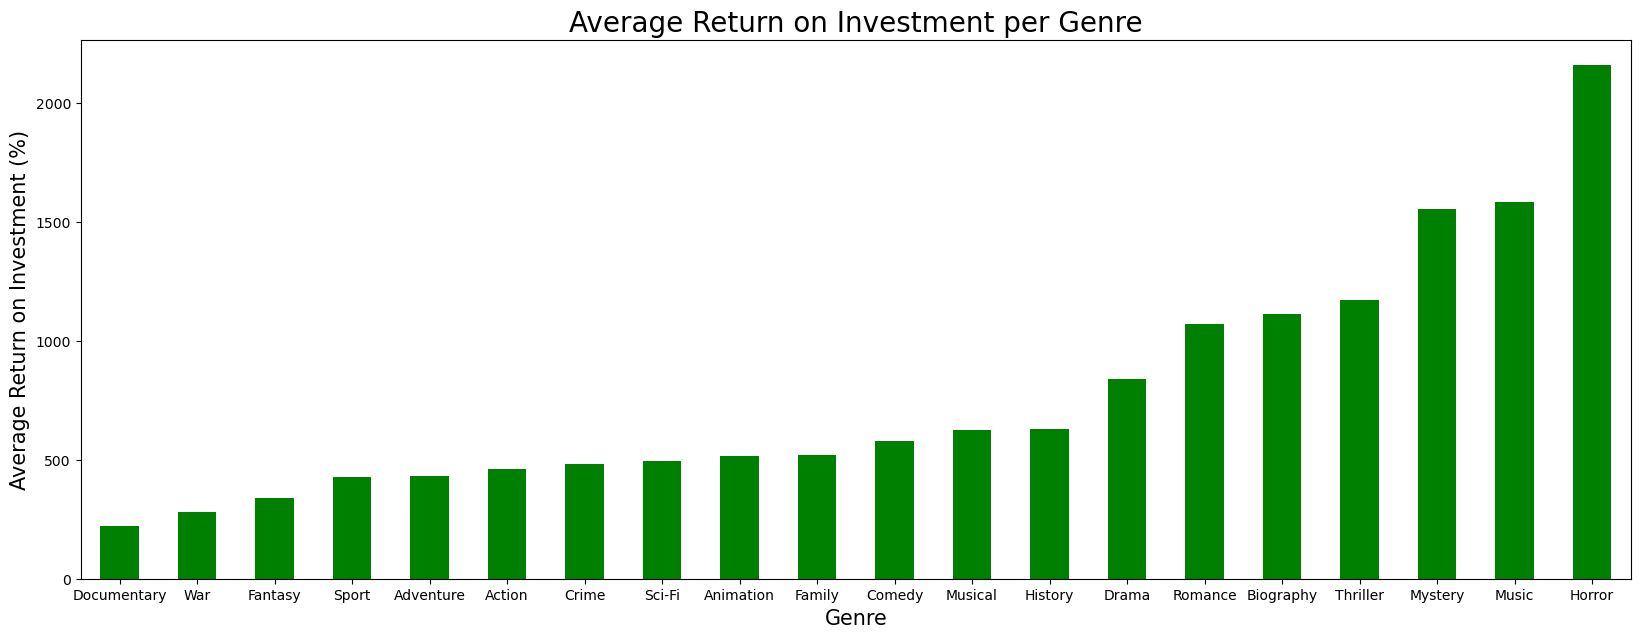

In [159]:
fig, ax = plt.subplots(figsize=(8,6))

genre_data_df.groupby('genres')['RoI'].mean().sort_values().plot(kind='bar',color='green')
ax.set_xlabel('Genre', fontsize=15)
plt.xticks(rotation=0)
ax.set_ylabel('Average Return on Investment (%)', fontsize=15)
ax.set_title('Average Return on Investment per Genre', fontsize=20);

It is evident that the average return on investment for the "musical" and "horror" genres is higher than that of other genres. But before drawing any conclusions, we must first determine how many films have been released in each genre and how widely they are distributed.

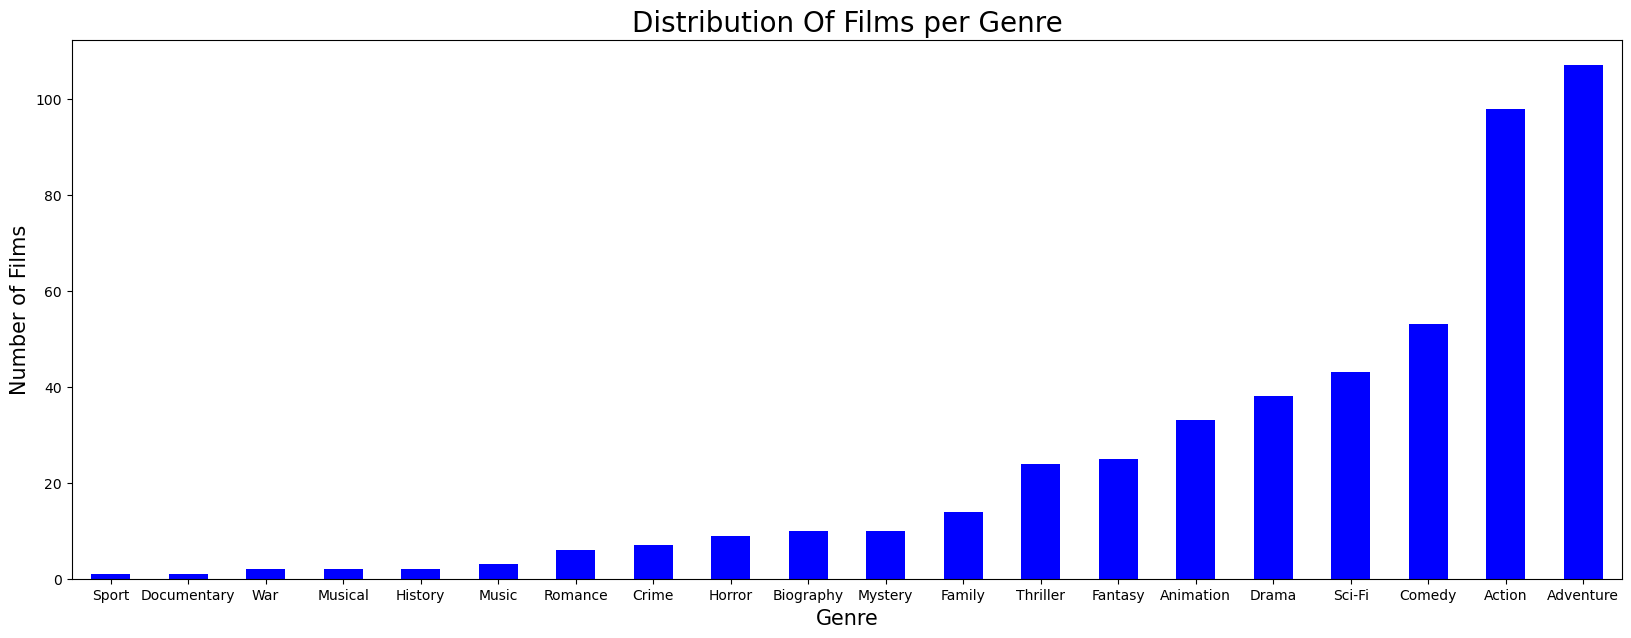

In [167]:
fig, ax = plt.subplots(figsize=(8,6))

genre_data_df.groupby('genres')['title'].count().sort_values().plot(kind='bar', figsize=(20,7), color='blue')
ax.set_xlabel('Genre', fontsize=15)
plt.xticks(rotation=0)
ax.set_ylabel('Number of Films', fontsize=15)
ax.set_title('Distribution Of Films per Genre', fontsize=20);

We can observe from the plot above that there is an uneven distribution of the film genre throughout the dataset. Thus, it is important to consider that the fact that there are fewer films in the "Horror" and "Musical" genres accounts for their greater average return on investment. It is noteworthy, meanwhile, that the bulk of the initially chosen top 200 highest Grossing Films were Action and Adventure films. This implies that action and adventure films bring in the highest money on average.



4.2 Seasons when Movies were released visualization

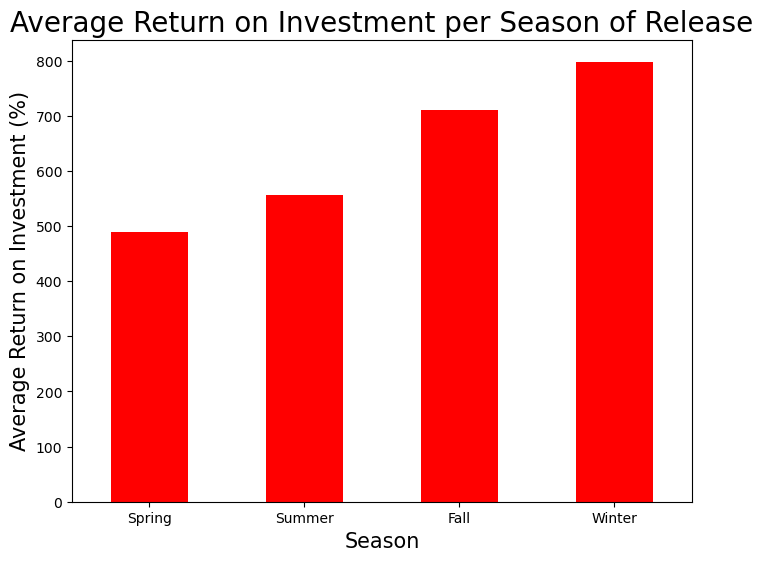

In [166]:
# making a bar graph that shows average return on investment  by season when the monie was released
fig, ax = plt.subplots(figsize=(8,6))

release_df.groupby('release_season')['RoI'].mean().sort_values().plot(kind='bar', color='red')
ax.set_xlabel('Season', fontsize=15)
plt.xticks(rotation=0)
ax.set_ylabel('Average Return on Investment (%)', fontsize=15)
ax.set_title('Average Return on Investment per Season of Release', fontsize=20);

The bar plot above illustrates that films released in the winter have the highest average return on investment. Fall, Summer, and finally Spring come right after it. But before drawing any conclusions, we must consider how the films that are released each season are distributed.

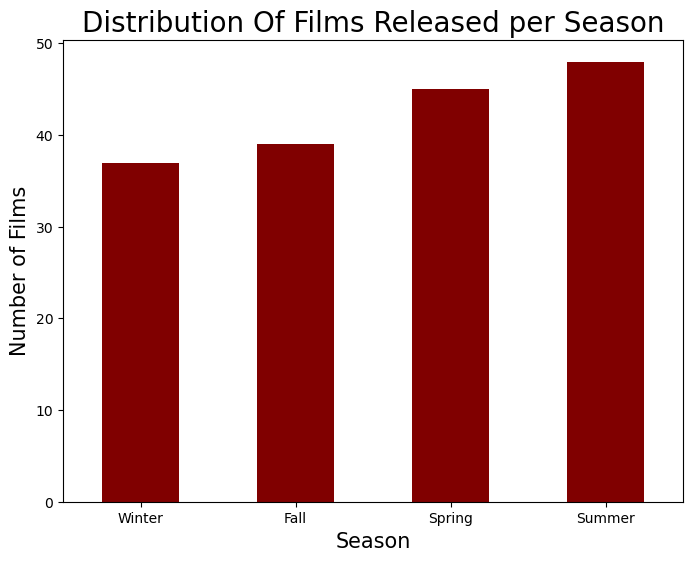

In [165]:
fig, ax = plt.subplots(figsize=(8,6))

release_df.groupby('release_season')['title'].count().sort_values().plot(kind='bar', color='maroon')
ax.set_xlabel('Season', fontsize=15)
plt.xticks(rotation=0)
ax.set_ylabel('Number of Films', fontsize=15)
ax.set_title('Distribution Of Films Released per Season', fontsize=20);

According to the 'Number of Films Released per Season' plot above, the number of films released each season is distributed reasonably evenly. The average return on investment is not the lowest, even though summer has the most films released; rather, it is comparable to the average return on investment for the best (fall) season. This implies that the summer would be the ideal time of year to release a movie.

4.3 Director Visualization

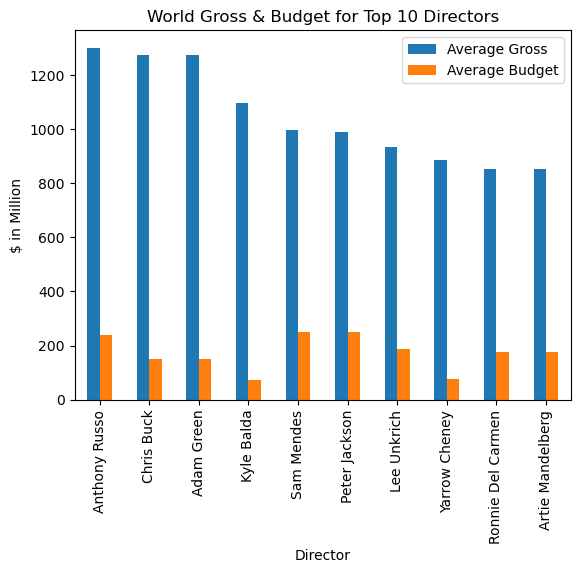

In [163]:
directors10.plot(
    x="director", y=["world_gross_avg", "production_budget_avg"], kind="bar"
)
plt.xlabel("Director")
plt.ylabel("$ in Million")
plt.legend(["Average Gross", "Average Budget"])
plt.title("World Gross & Budget for Top 10 Directors")
plt.show()

Text(0.5, 1.0, 'Average Return on Investment(ROI) by Director')

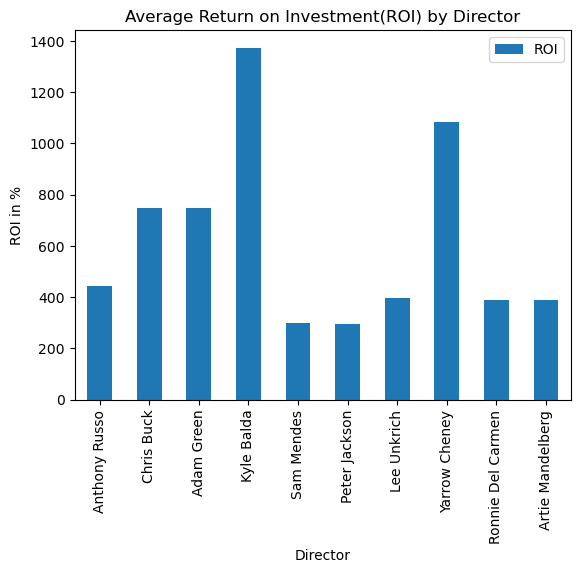

In [164]:
directors10["ROI"] = (directors10["earning_avg"] / directors10["production_budget_avg"] * 100)
directors10.plot(x="director", y="ROI", kind="bar")
plt.xlabel("Director")
plt.ylabel("ROI in %")
plt.title("Average Return on Investment(ROI) by Director")


Based on their earnings, ROI, gross, and production budget, the top 10 directors differ from one another, according to the data. Despite having the largest gross, Anthony Russo's ROI is comparatively low, and his production budget is expensive. This might be a possibility, depending on the amount of money allocated to Microsoft's movie studio endeavour. A director with a strong return on investment, such as Yarrow Cheney or Kyle Balda, would be a good choice for an animated film, even if the production budget is smaller. 

5. CONCLUSIONS 

. Chosing the right genre for the movies ; Genre types such as action and adventure bring in the most amount of money

. The best time to release films is during the summer season

. Chosing the right director for specific genre  bring a large  sum in return in investment ;such as Yarrow Cheney or Kyle Balda, would be a good choice for an animated films in comparison to the    budget of the movie